[https://colab.research.google.com/drive/18PUo69_NjWuWMy7uenpDHLqj8KmAs_l9?authuser=2#scrollTo=3vUXPjDe1j_i](https://colab.research.google.com/drive/18PUo69_NjWuWMy7uenpDHLqj8KmAs_l9?authuser=2#scrollTo=3vUXPjDe1j_i)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [109]:
# Colab 進行 matplotlib 繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-08-17 07:11:45--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 209.85.147.100, 209.85.147.102, 209.85.147.139, ...
Connecting to drive.google.com (drive.google.com)|209.85.147.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/eu0ri0l3o3mol3jfku10udpqj4vnbuu9/1692256275000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=82af36e6-6f03-4c12-b37b-8484cdea64f8 [following]
--2023-08-17 07:11:46--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/eu0ri0l3o3mol3jfku10udpqj4vnbuu9/1692256275000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=82af36e6-6f03-4c12-b37b-8484cdea64f8
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.194.132, 2607:f8b0:4001:c10::84
Connecting to doc-0

In [35]:
data_df = pd.read_csv('/content/drive/MyDrive/2023_DA_military/dispPt.csv')

# Utils

In [37]:
## 建立 table: 人名對應其所屬 banner
person_of_banner = data_df.iloc[:,0:2].drop_duplicates()

# Data overview

In [17]:
data_df.iloc[0:2,]

,Banner,Person,Era,YoE,Loc1st,Loc2nd,Section,Page,text,Loc,lat,lon,year
0,鑲黃旗,楊名高,崇德,七年,錦州,[],八旗通志初集卷之一百七十三名臣列傳三十三,4210,崇德七年，任牛彔章京，隨固山額真劉之源征明圍錦州，擊敗山口敵兵。又用紅衣炮攻克塔山城，並收附...,錦州,41.100310,121.124024,1642
1,鑲黃旗,楊名高,崇德,七年,塔山,['諸臺'],八旗通志初集卷之一百七十三名臣列傳三十三,4210,崇德七年，任牛彔章京，隨固山額真劉之源征明圍錦州，擊敗山口敵兵。又用紅衣炮攻克塔山城，並收附...,塔山,40.821941,120.935895,1642


## 資料數量

In [18]:
print(data_df.shape)

(544, 13)


## Select the columns of interest

In [19]:
# select interesting variables without coordinates (10,11)
column_names = data_df.columns
column_names_select = column_names[[0,1,2,9,12]]
print(column_names_select)


Index(['Banner', 'Person', 'Era', 'Loc', 'year'], dtype='object')


## Number of distinct(unique) values

In [6]:
# how many unique values in an intresting column
for column_name in column_names_select:
  num_unique_values = data_df[column_name].nunique()
  print(f"{column_name}:{num_unique_values}")


Banner:8
Person:120
Era:3
Loc:28
year:18


## Distribution of 'Banner'

  Banner  count
0    正白旗     95
1    鑲黃旗     90
2    正黃旗     88
3    正藍旗     84
4    鑲白旗     74
5    鑲紅旗     48
6    鑲藍旗     33
7    正紅旗     32


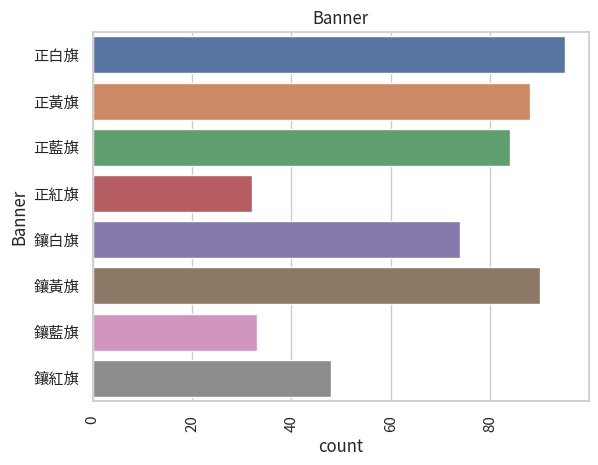

In [118]:
column_name = 'Banner'
order = ['正白旗', '正黃旗', '正藍旗', '正紅旗', '鑲白旗', '鑲黃旗', '鑲藍旗', '鑲紅旗']

column_counts = data_df[column_name].value_counts().reset_index() # reset_index: 把 index 變成 column
column_counts.columns = ['Banner', 'count']

sns.barplot(x='count', y='Banner', data=column_counts, order = order, orient='h')
plt.title(column_name)
plt.xticks(rotation='vertical')
plt.show()

## Distribution of 'Banner' and 'Era'

In [110]:
df = data_df[['Banner', 'Era']]

# 使用 groupby 按年份和 Banner 分组，计算筆數
banner_era_counts = df.groupby(['Era', 'Banner']).size().reset_index()
banner_era_counts = banner_era_counts.fillna(0) # NaN 補 0

# assign column names (不知為第三個欄位是0何無法直接修改)
banner_era_counts.rename(columns=lambda x: f'Count_{x}', inplace=True)
banner_era_counts.columns = ['Era','Banner','count']

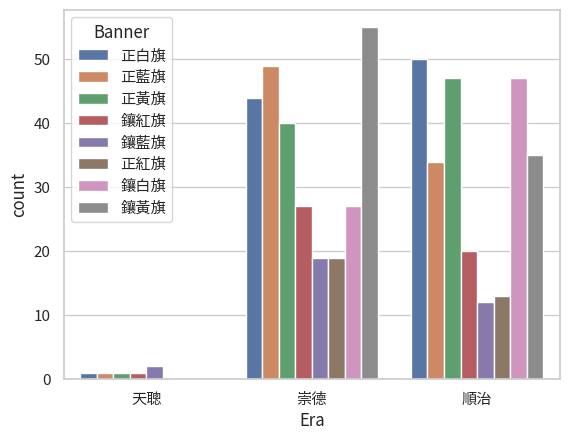

In [111]:
sns.barplot(data=banner_era_counts, x='Era', y='count', hue='Banner')
plt.show()


## Time series of 'Banner'

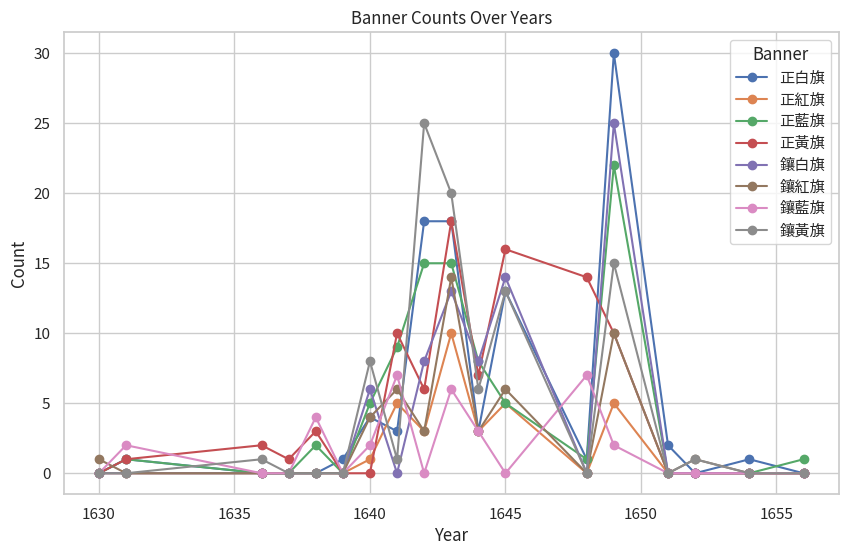

In [125]:
df = data_df[['Banner', 'year']]

# 使用 groupby 按年份和 Banner 分组，计算筆數
banner_year_counts = df.groupby(['year', 'Banner']).size().unstack()
banner_year_counts = banner_year_counts.fillna(0) # NaN 補 0

# 绘制折线图展示每个班级随着年份变化的人数
ax = banner_year_counts.plot(kind='line', marker='o', figsize=(10, 6))
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Banner Counts Over Years')
ax.legend(title='Banner')
plt.show()

In [126]:
banner_year_counts

Banner,正白旗,正紅旗,正藍旗,正黃旗,鑲白旗,鑲紅旗,鑲藍旗,鑲黃旗
year,,,,,,,,
1630,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1631,1.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0
1636,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
1637,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1638,0.0,0.0,2.0,3.0,0.0,0.0,4.0,0.0
1639,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1640,4.0,1.0,5.0,0.0,6.0,4.0,2.0,8.0
1641,3.0,5.0,9.0,10.0,0.0,6.0,7.0,1.0
1642,18.0,3.0,15.0,6.0,8.0,3.0,0.0,25.0
